In [5]:
#tensorflow implementation
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [6]:
# Load the breast cancer dataset
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [7]:
# Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Build the model using Input layer
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Dense layer
])

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model and capture the history
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4090 - loss: 1.0562 - val_accuracy: 0.4474 - val_loss: 0.9328
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5237 - loss: 0.9070 - val_accuracy: 0.5351 - val_loss: 0.8185
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5343 - loss: 0.7927 - val_accuracy: 0.5702 - val_loss: 0.7199
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5850 - loss: 0.7350 - val_accuracy: 0.6491 - val_loss: 0.6358
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6965 - loss: 0.6125 - val_accuracy: 0.7281 - val_loss: 0.5668


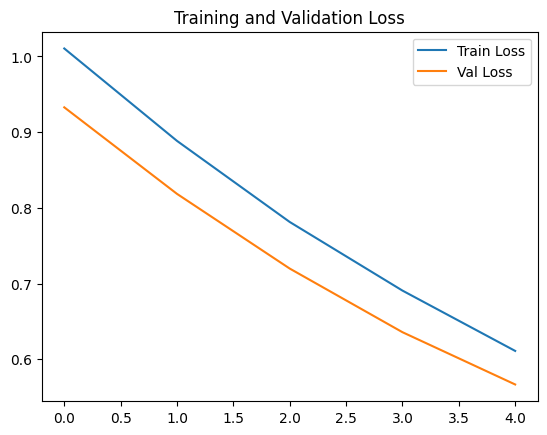

In [13]:
# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

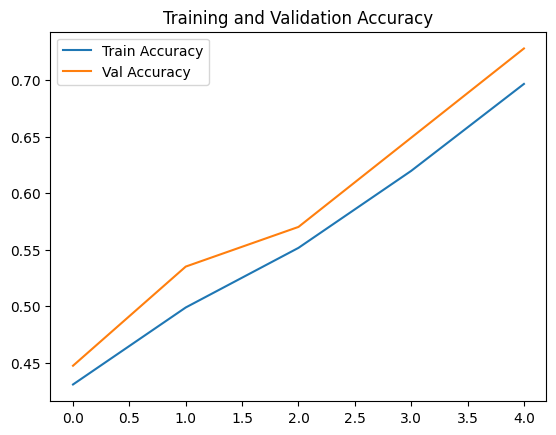

In [14]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [15]:
#Pytorch implementation
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [16]:
# Load the breast cancer dataset
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [17]:
# Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Convert to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [19]:
# Define the model
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        return x

In [20]:
# Initialize the model
model = SimpleNN(input_size=X_train.shape[1])

In [21]:
# Loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [22]:
# Training loop
epochs = 5
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_train_tensor)
    
    # Calculate loss
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass
    loss.backward()
    optimizer.step()
    
    # Calculate accuracy
    predicted = (outputs > 0.5).float()
    accuracy = (predicted == y_train_tensor).float().mean()
    
    train_losses.append(loss.item())
    train_accuracies.append(accuracy.item())
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {accuracy.item():.4f}")

Epoch 1/5, Loss: 0.8075, Accuracy: 0.2967
Epoch 2/5, Loss: 0.7997, Accuracy: 0.3077
Epoch 3/5, Loss: 0.7920, Accuracy: 0.3209
Epoch 4/5, Loss: 0.7843, Accuracy: 0.3341
Epoch 5/5, Loss: 0.7768, Accuracy: 0.3385


In [23]:
# Evaluate the model
model.eval()
with torch.no_grad():
    outputs_test = model(X_test_tensor)
    predicted_test = (outputs_test > 0.5).float()
    accuracy_test = (predicted_test == y_test_tensor).float().mean()

print(f"Test Accuracy: {accuracy_test.item() * 100:.2f}%")


Test Accuracy: 46.49%


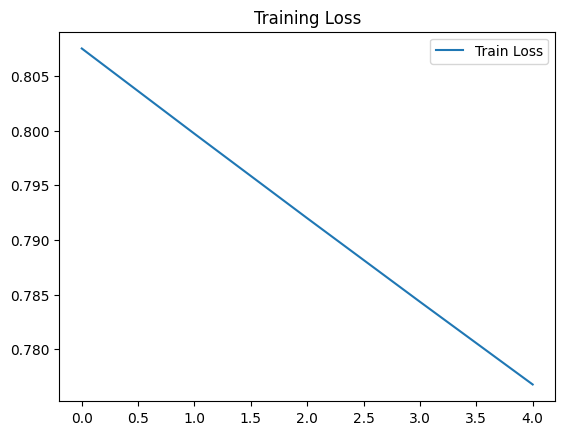

In [24]:
# Plotting training loss and accuracy
plt.plot(train_losses, label='Train Loss')
plt.legend()
plt.title('Training Loss')
plt.show()

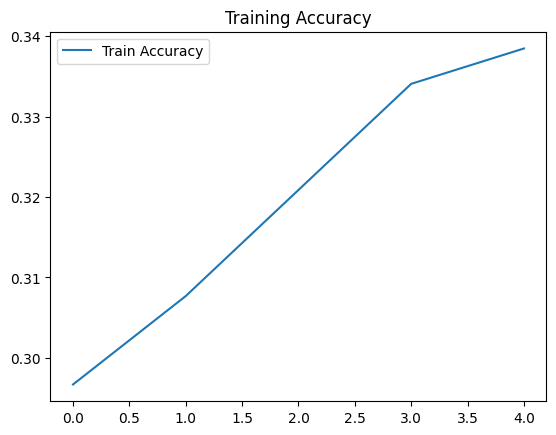

In [25]:
plt.plot(train_accuracies, label='Train Accuracy')
plt.legend()
plt.title('Training Accuracy')
plt.show()